# Medical-MNSIT CNN

Example of classifying medical mnsit images with TensorFlow

Download the data from https://www.kaggle.com/andrewmvd/medical-mnist. First, click "Download (80 MB)". Sign in with a prefered email and download the zip file. Then uncompress it.

Some of the commented code is to allow change to different classes (or add them all to the model).

code from https://www.kaggle.com/sarimsikander/medical-mnist-cnn-99-96-accuracy

In [1]:
import numpy as np # linear algebra
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tqdm import tqdm  
import cv2
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import callbacks
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline

In [2]:
path = '../../data/kaggle-medical-mnist/archive/'

In [3]:
#classes = {'AbdomenCT': 0, 'BreastMRI': 1, 'ChestCT': 2, 'CXR': 3, 'Hand': 4, 'HeadCT': 5}
classes = {'AbdomenCT': 0, 'ChestCT': 1}

In [4]:
IMAGE_WIDTH=64
IMAGE_HEIGHT=64
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
BATCH_SIZE=64
N_CLASSES = 2#6 #Change this according to the number of classes, which can be up to 6 in this example (6 types of images available)
EPOCHS = 1 #5 5 was set when all the classes where used

In [5]:
abdomen_DIR = os.path.join(path, 'AbdomenCT') 
#breastmri_DIR = os.path.join(path, 'BreastMRI''
chestct_DIR = os.path.join(path, 'ChestCT')
#cxr_DIR = os.path.join(path, 'CXR')
#hand_DIR = os.path.join(path, 'Hand')
#headct = os.path.join(path, 'HeadCT')

In [6]:
def assign_label(img,class_type):
    return class_type

X = []
y = []

def make_train_data(class_type,DIR):
    #print(DIR)
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,class_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMAGE_WIDTH,IMAGE_HEIGHT))
        
        X.append(np.array(img))
        y.append(str(label))

In [7]:
make_train_data(classes.get('AbdomenCT'), abdomen_DIR)

100%|██████████| 10000/10000 [00:00<00:00, 13253.26it/s]


In [ ]:
#make_train_data(classes.get('BreastMRI'), breastmri_DIR)

In [8]:
make_train_data(classes.get('ChestCT'), chestct_DIR)

100%|██████████| 10000/10000 [00:00<00:00, 11066.52it/s]


In [ ]:
#make_train_data(classes.get('CXR'), cxr_DIR)

In [ ]:
#make_train_data(classes.get('Hand'), hand_DIR)

In [ ]:
#make_train_data(classes.get('HeadCT'), headct)

In [9]:
len(X)
y = np.array(y)
X = np.array(X)
X.shape

(20000, 64, 64, 3)

In [10]:
X_train,X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.1, random_state=58954)

In [11]:
k = len(set(y_train))
print("Number of classes, ", k)

Number of classes,  2


In [12]:
X_train = X_train.astype('float64')/255
X_test = X_test.astype('float64')/255

In [13]:
y_train = to_categorical(y_train, num_classes=k)
y_test = to_categorical(y_test, num_classes=k)

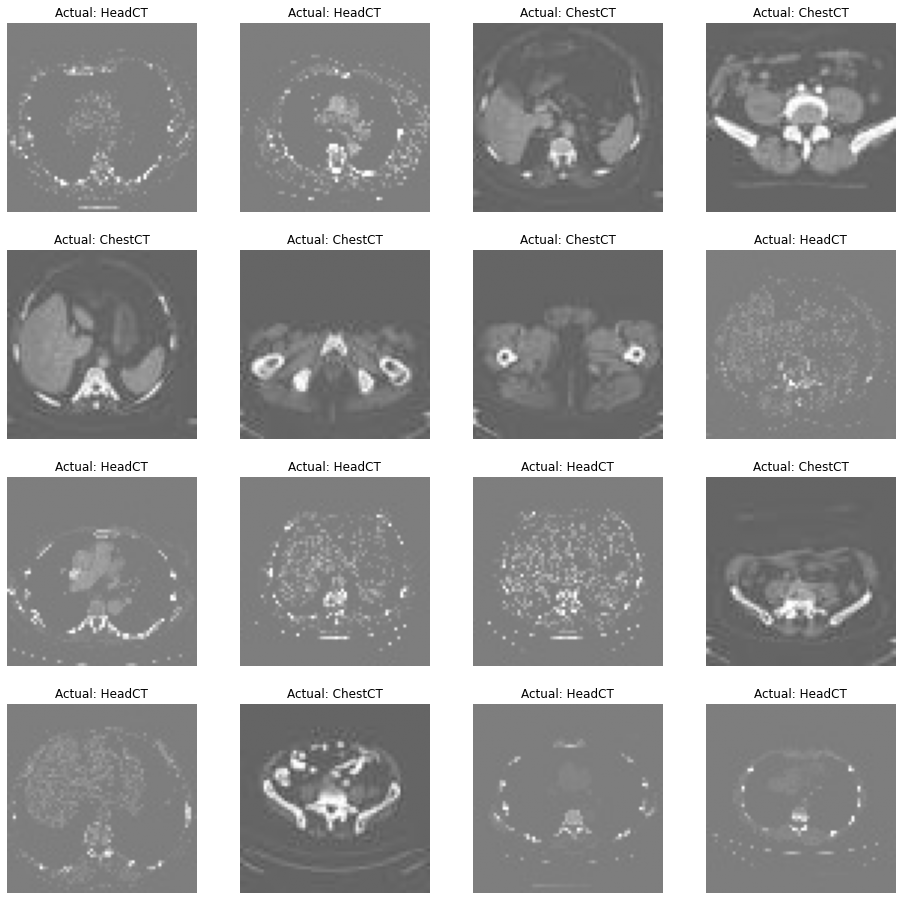

In [14]:
labels = '''ChestCT
HeadCT'''.split("\n")

#labels = '''AbdomenCT
#BreastMRI
#ChestCT
#CXR
#Hand
#HeadCT'''.split("\n")


plt.figure(figsize=(16,16))
j = 1
for i in np.random.randint(0,1000,16):
    plt.subplot(4,4,j); j+=1
    plt.imshow(X_train[i],cmap = 'Greys')
    plt.axis('off')
    plt.title("Actual: {}".format(labels[np.argmax(y_train[i])]))
    #plt.title('{} / {}'.format(labels[y_train[i]],y_train[i]))


In [15]:
i = layers.Input(shape = (X_train[0].shape))
x = layers.Conv2D(64, (3,3), activation='relu', strides = (2,2), padding= 'same')(i)
x = layers.Conv2D(64, (3,3), activation='relu', strides = (2,2), padding= 'same')(x)
x = layers.Conv2D(32, (3,3), activation='relu', strides = (2,2), padding= 'same')(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(k, activation='softmax')(x)

model = Model(i, x)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0     

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,
                              patience=3, min_lr=0.00001)

model.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, 
          validation_data=  (X_test,y_test), callbacks=[reduce_lr])

282/282 [==============================] - 34s 118ms/step - loss: 0.1037 - accuracy: 0.9497 - val_loss: 0.0020 - val_accuracy: 1.0000 - lr: 0.0010


In [18]:
reduce_lr

The class of this is: 1


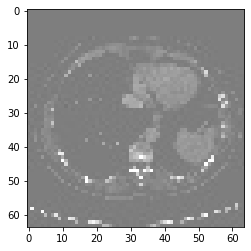

In [19]:
print("The class of this is: {}".format(np.argmax(y_train[10])))
plt.imshow(X_train[10], cmap='gray')
plt.show()

Confusion matrix, without normalization
[[ 992    0]
 [   0 1008]]


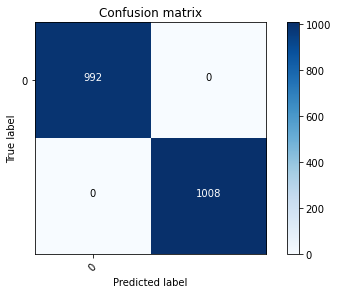

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(np.argmax(y_test, axis= 1), p_test)
plot_confusion_matrix(cm, list(range(k-1)))

In [ ]:
misclassified_idx = np.where(p_test != np.argmax(y_test, axis= 1))[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[np.argmax(y_test[i])], labels[p_test[i]]));